# IWO SZCZEPANIAK

- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [165]:
using LinearAlgebra,Statistics,Measures,DataFrames,CSV,Plots

In [166]:
df = DataFrame(Size=Int[],Scalar=Float64[],Vector=Float64[])
println(df)

0×3 DataFrame
 Row │ Size   Scalar   Vector  
     │ Int64  Float64  Float64 
─────┴─────────────────────────


In [167]:
for length = 2:5:102
    for i = 1:11
        first = rand(0:9,length)
        second = rand(0:9,length)
        matrix = rand(0:9,(length,length))
        time1 = @elapsed dot(first,second)
        time2 = @elapsed matrix * first
        if i != 1
            push!(df,(length, time1, time2))
        end
    end
end
println(df)

210×3 DataFrame
 Row │ Size   Scalar   Vector  
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │     2   0.0      3.0e-7
   2 │     2   0.0      1.0e-7
   3 │     2   1.0e-7   0.0
   4 │     2   0.0      1.0e-7
   5 │     2   0.0      0.0
   6 │     2   0.0      0.0
   7 │     2   0.0      0.0
   8 │     2   1.0e-7   0.0
   9 │     2   1.0e-7   1.0e-7
  10 │     2   0.0      0.0
  11 │     7   0.0      1.0e-7
  12 │     7   0.0      1.0e-7
  13 │     7   1.0e-7   4.0e-7
  14 │     7   0.0      1.0e-7
  15 │     7   1.0e-7   1.0e-7
  16 │     7   1.0e-7   1.0e-7
  17 │     7   1.0e-7   1.0e-7
  18 │     7   1.0e-7   1.0e-7
  19 │     7   1.0e-7   1.0e-7
  20 │     7   0.0      1.0e-7
  21 │    12   1.0e-7   1.0e-7
  22 │    12   1.0e-7   2.0e-7
  23 │    12   1.0e-7   1.0e-7
  24 │    12   0.0      1.0e-7
  25 │    12   0.0      2.0e-7
  26 │    12   1.0e-7   1.0e-7
  27 │    12   1.0e-7   1.0e-7
  28 │    12   0.0      2.0e-7
  29 │    12   1.0e-7   1.0e-7
  30 │ 

### Zapis danych do pliku CSV

In [168]:
CSV.write("df.csv",df)

"df.csv"

#### Wczytanie danych z pliku csv

In [169]:
df_to_analyse = CSV.read("df.csv", DataFrame)
println(df_to_analyse)

210×3 DataFrame
 Row │ Size   Scalar   Vector  
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │     2   0.0      3.0e-7
   2 │     2   0.0      1.0e-7
   3 │     2   1.0e-7   0.0
   4 │     2   0.0      1.0e-7
   5 │     2   0.0      0.0
   6 │     2   0.0      0.0
   7 │     2   0.0      0.0
   8 │     2   1.0e-7   0.0
   9 │     2   1.0e-7   1.0e-7
  10 │     2   0.0      0.0
  11 │     7   0.0      1.0e-7
  12 │     7   0.0      1.0e-7
  13 │     7   1.0e-7   4.0e-7
  14 │     7   0.0      1.0e-7
  15 │     7   1.0e-7   1.0e-7
  16 │     7   1.0e-7   1.0e-7
  17 │     7   1.0e-7   1.0e-7
  18 │     7   1.0e-7   1.0e-7
  19 │     7   1.0e-7   1.0e-7
  20 │     7   0.0      1.0e-7
  21 │    12   1.0e-7   1.0e-7
  22 │    12   1.0e-7   2.0e-7
  23 │    12   1.0e-7   1.0e-7
  24 │    12   0.0      1.0e-7
  25 │    12   0.0      2.0e-7
  26 │    12   1.0e-7   1.0e-7
  27 │    12   1.0e-7   1.0e-7
  28 │    12   0.0      2.0e-7
  29 │    12   1.0e-7   1.0e-7
  30 │ 

### Analiza pomiarów

In [170]:
analysis = combine(groupby(df_to_analyse, :Size), :Scalar => mean,  :Scalar => std, :Vector => mean, :Vector => std)

println(analysis)

21×5 DataFrame
 Row │ Size   Scalar_mean  Scalar_std  Vector_mean  Vector_std 
     │ Int64  Float64      Float64     Float64      Float64    
─────┼─────────────────────────────────────────────────────────
   1 │     2       3.0e-8  4.83046e-8      6.0e-8   9.66092e-8
   2 │     7       6.0e-8  5.16398e-8      1.3e-7   9.48683e-8
   3 │    12       7.0e-8  4.83046e-8      1.3e-7   4.83046e-8
   4 │    17       5.0e-8  5.27046e-8      1.6e-7   6.99206e-8
   5 │    22       6.0e-8  5.16398e-8      2.2e-7   4.21637e-8
   6 │    27       4.0e-8  5.16398e-8      4.8e-7   1.81353e-7
   7 │    32       4.0e-8  5.16398e-8      3.3e-7   9.48683e-8
   8 │    37       5.0e-8  5.27046e-8      6.2e-7   5.94045e-7
   9 │    42       4.0e-8  5.16398e-8      5.3e-7   9.48683e-8
  10 │    47       5.0e-8  5.27046e-8      6.9e-7   1.37032e-7
  11 │    52       7.0e-8  4.83046e-8      7.1e-7   8.75595e-8
  12 │    57       3.0e-8  4.83046e-8      8.8e-7   1.31656e-7
  13 │    62       3.0e-8  4.83046e-8

In [171]:
analysis2 = describe(df_to_analyse)
println(analysis2)

3×7 DataFrame
 Row │ variable  mean         min   median   max       nmissing  eltype   
     │ Symbol    Float64      Real  Float64  Real      Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────
   1 │ Size      52.0          2    52.0     102              0  Int64
   2 │ Scalar     5.33333e-8   0.0   1.0e-7    3.0e-7         0  Float64
   3 │ Vector     9.49048e-7   0.0   8.0e-7    2.9e-6         0  Float64


## Wizualna reprezentacja wyników

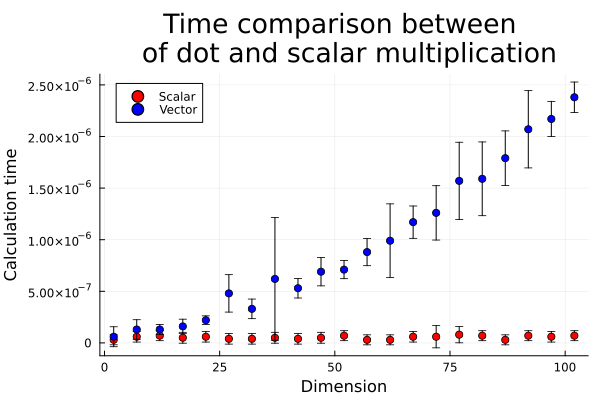

In [175]:
scatter(analysis.Size, [analysis.Scalar_mean, analysis.Vector_mean], color =  [:red :blue ], yerr=[analysis.Scalar_std analysis.Vector_std],
label = ["Scalar" "Vector"], title = "Time comparison between \n of dot and scalar multiplication\n", titlefont=font("sans-serif", 18))
xlabel!("Dimension")
ylabel!("Calculation time")

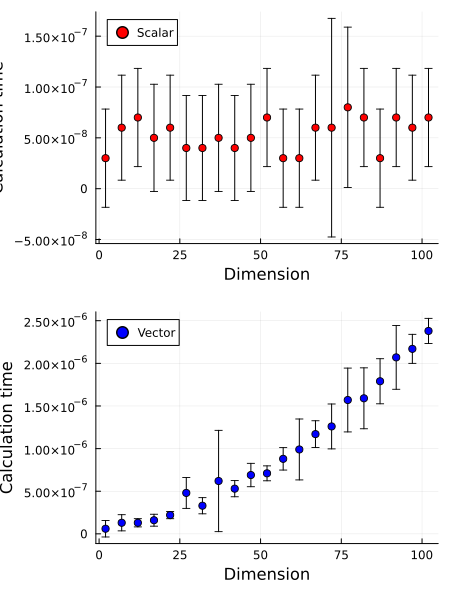

In [173]:
scatter(analysis.Size, [analysis.Scalar_mean, analysis.Vector_mean], color =  [:red :blue ], yerr=[analysis.Scalar_std analysis.Vector_std], 
layout = (2,1), label = ["Scalar" "Vector"], size = (450, 600))

xlabel!("Dimension")
ylabel!("Calculation time")

## WNIOSKI

Wizualna reprezentacja danych potwierdziła przypuszczenia. Czas obliczania iloczynu skalarnego dwóch macierzy rośnie bardzo powoli - ale liniowo - względem długości macierzy, a obliczanie iloczynu macierzy kwadratowej przez skalar rośnie kwadratowo względem długości boku macierzy.